<a href="https://colab.research.google.com/github/minjeong-kim-git/GNUVILL_AI/blob/main/GNUVILL_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%8A%A4%ED%84%B0%EB%94%94(%EA%B8%B0%EC%B4%88)_3%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5%2B%EA%B3%BC%EC%A0%9C_%EB%8B%B5%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNUVILL 인공지능 스터디(기초) 3주차 과제 답안

선형회귀 복습 + 경사하강법 실습
: 당뇨병 환자의 데이터를 토대로 선형 회귀를 진행해보고 경사 하강법도 적용해봅시다!



---

##1. 라이브러리

*  **matplotlib**: 시각화 관련 함수들을 모아놓은 모듈(그래프를 그려준다!)

  자세한 정보는 https://matplotlib.org/ 참고

In [1]:
import matplotlib.pyplot as plt

##2. 데이터셋 준비



*   **sklearn.datasets**: 대표적인 sample dataset들을 제공하고 쉽게 다운로드 받을 수 있음.

  ex) 아이리스, 보스턴 집값 데이터, 당뇨병 환자 데이터 등
  
  https://teddylee777.github.io/scikit-learn/Sklearn-dataset-%EB%AA%A8%EB%93%88%EC%9D%84-%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC-dataset%EB%A1%9C%EB%94%A9%ED%95%98%EA%B8%B0
*   **load_diabetes**: 당뇨병 환자 데이터셋 준비



In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

## 3. 입력과 타깃 데이터의 크기 확인

data는 442 * 10 크기의 2차원 배열, target은 442개의 요소를 가진 1차원 배열

행은 샘플(sample), 열은 샘플의 특성(feature) 의미



---


*  **샘플**: 당뇨병 환자에 대한 특성으로 이루어진 데이터 1세트
*   **특성**: 당뇨병 환자들의 여러 특징 ex) 키, 몸무게, 혈압, 혈당 등

---


*   **.shape**: 행렬의 차원, 크기 확인







In [4]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [5]:
print(diabetes.data[0:3])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]]


In [6]:
print(diabetes.target[:3])

[151.  75. 141.]


In [7]:
x = diabetes.data[:,2]
y = diabetes.target

## 4. 시각화(산포도 그리기)



*   **plt.scatter**: 산포도 그리기
*   **plt.xlabel("  ")**: x축에 괄호 안에 들어가는 문자, 또는 문자열로 이름을 붙임
* **plt.ylabel("  ")**: y축에 괄호 안에 들어가는 문자, 또는 문자열로 이름을 붙임



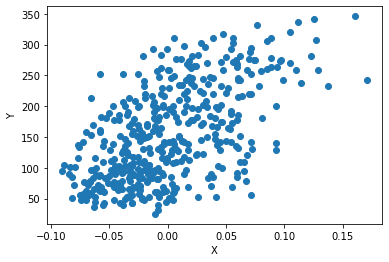

In [8]:
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 5. 경사 하강법

### 1) 가중치 초기화

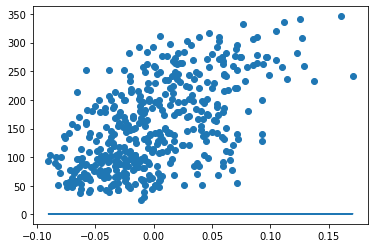

In [12]:
# 입력 x와 타깃 y
plt.scatter(x,y)

# 입력 x와 예측값 y_hat
y_hat = W * x + b 
plt.plot(x,y_hat)

plt.show()

### 2) 예측값 구하기

In [14]:
def forpass(x) :
  y_hat = W * x + b
  return y_hat

### 3) 가중치 업데이트

In [18]:
def backprop(x, err) :
  W_grad = x * err
  b_grad = 1* err
  return W_grad, b_grad

### 4) 모든 샘플과 에포크에 대해 반복

In [21]:
def fit(x, y, epochs=100) :
  global W
  global b
  for i in range(epochs) :
    for x_i, y_i in zip(x,y) :
      y_hat = forpass(x_i)
      err = - (y_i - y_hat)
      W_grad, b_grad = backprop(x_i, err)
      W -= W_grad
      b -= b_grad

### 5) 알고리즘 실행 후 결과 그래프 확인

In [22]:
fit(x,y)

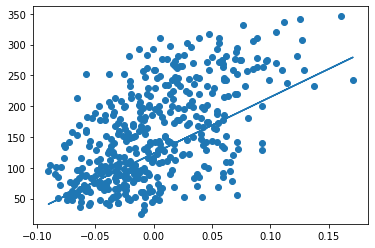

In [24]:
# 입력 x와 타깃 y
plt.scatter(x,y)

# 입력 x와 예측값 y_hat
y_hat = W * x + b
plt.plot(x,y_hat)

plt.show()